In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
ipl.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,76014.0,308.627740,178.156878,1.0,154.0,308.0,463.0,617.0
runs,76014.0,74.889349,48.823327,0.0,34.0,70.0,111.0,263.0
wickets,76014.0,2.415844,2.015207,0.0,1.0,2.0,4.0,10.0
overs,76014.0,9.783068,5.772587,0.0,4.6,9.6,14.6,19.6
runs_last_5,76014.0,33.216434,14.914174,0.0,24.0,34.0,43.0,113.0
wickets_last_5,76014.0,1.120307,1.053343,0.0,0.0,1.0,2.0,7.0
striker,76014.0,24.962283,20.079752,0.0,10.0,20.0,35.0,175.0
non-striker,76014.0,8.869287,10.795742,0.0,1.0,5.0,13.0,109.0
total,76014.0,160.901452,29.246231,67.0,142.0,162.0,181.0,263.0


In [6]:
data = ipl.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()
matches_count

venue
M Chinnaswamy Stadium                                   61
Eden Gardens                                            58
Feroz Shah Kotla                                        57
Wankhede Stadium                                        57
MA Chidambaram Stadium, Chepauk                         48
Rajiv Gandhi International Stadium, Uppal               47
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               14
Sardar Patel Stadium, Motera                            12
Brabourne Stadium                                       11
SuperSport Park                                         11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Saurashtra Cricket Association Stadium            

C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_2376\1405320105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")


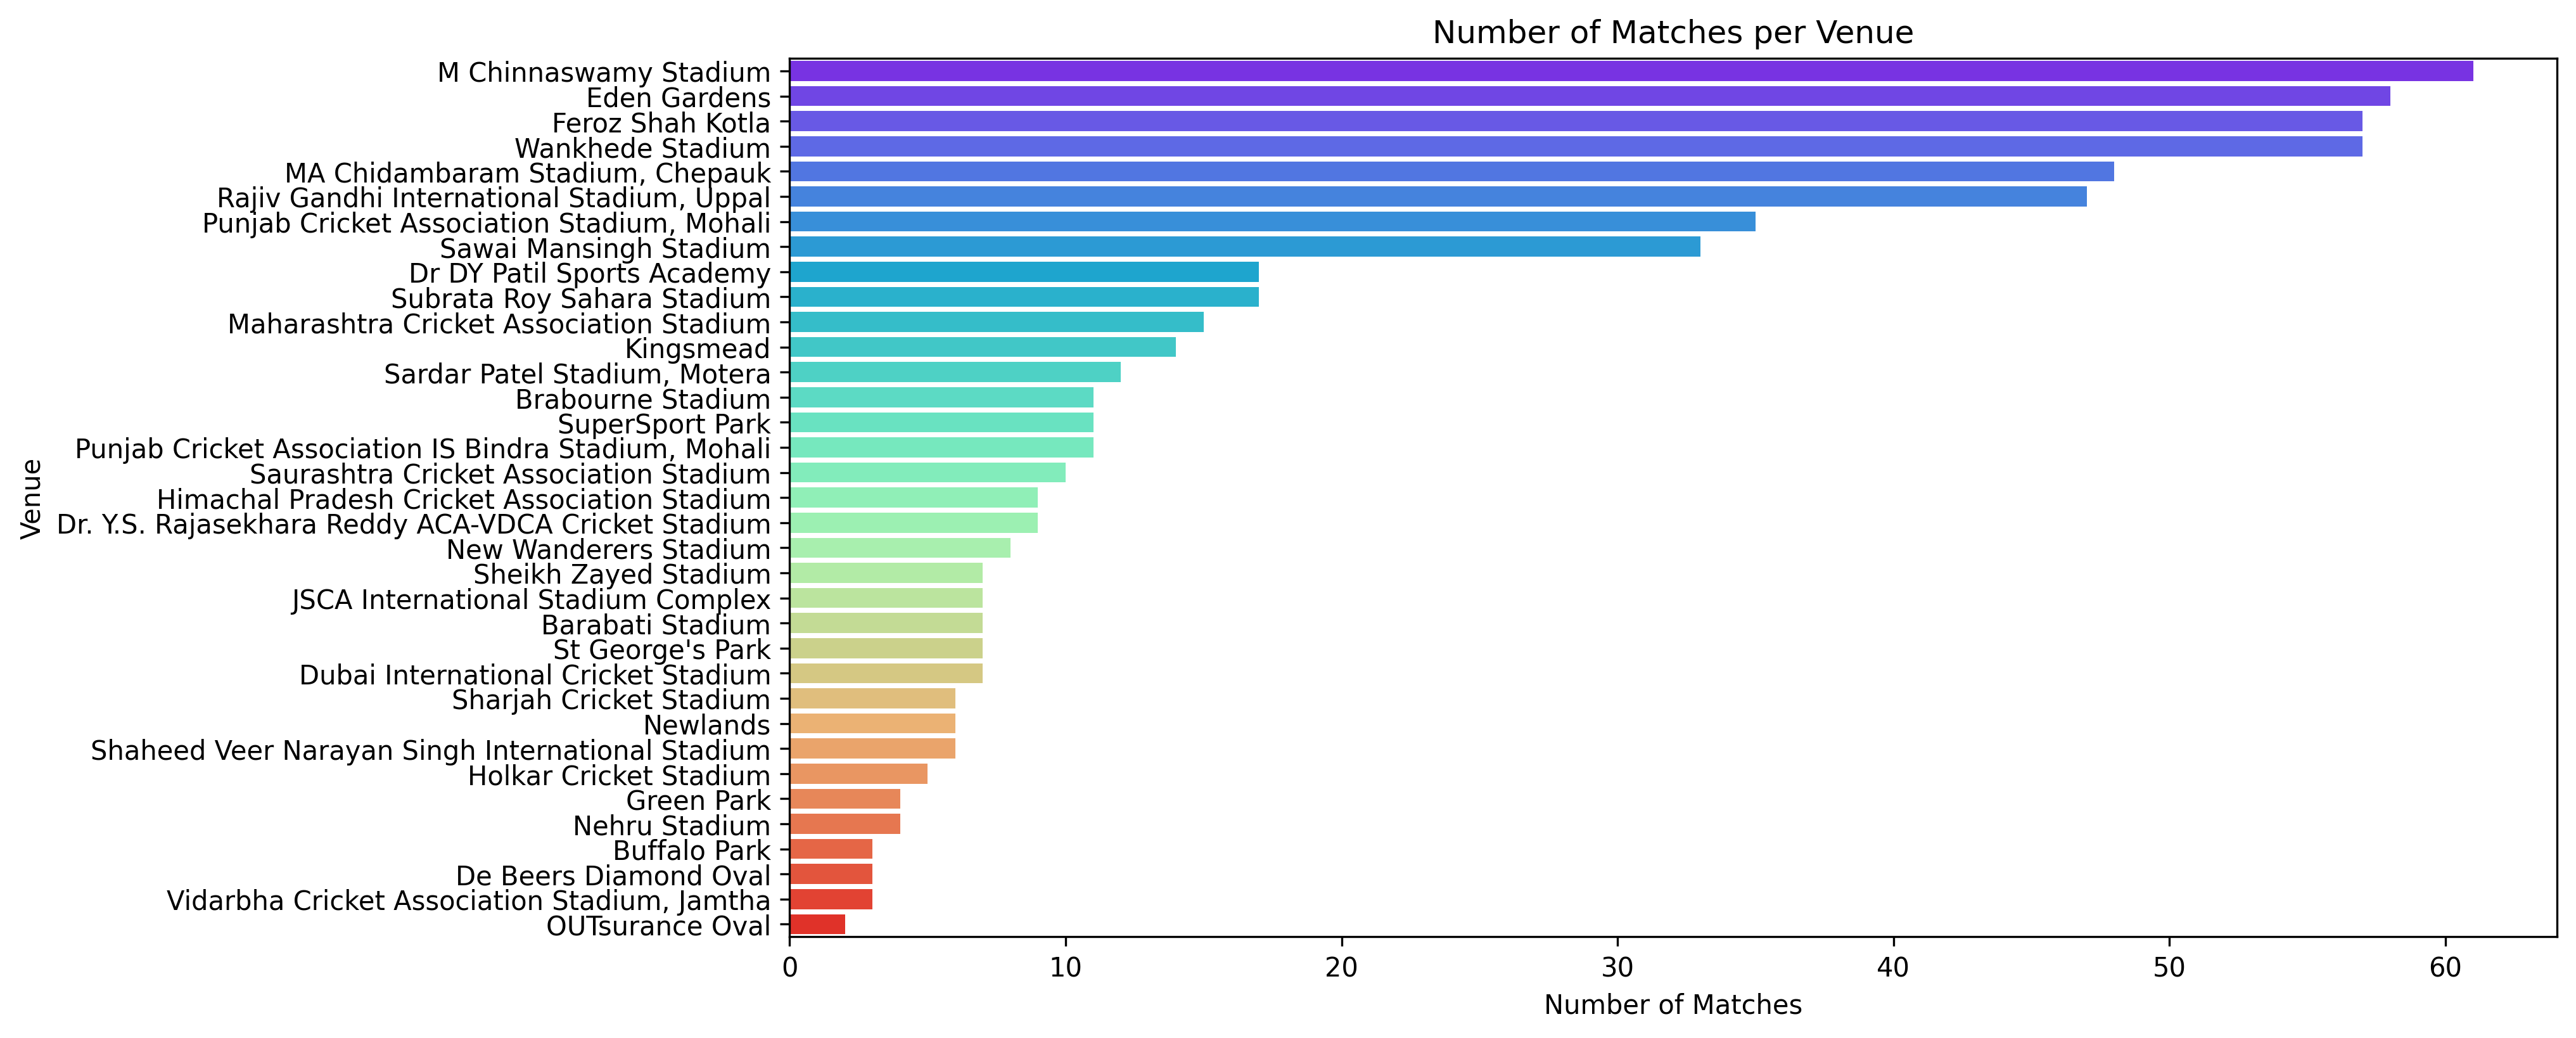

In [7]:
plt.figure(figsize=(12,6), dpi=300)
sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

In [8]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)
runs_by_batsman

batsman
R Rampaul         263
CH Gayle          263
SS Tiwary         262
AB de Villiers    251
SR Watson         248
V Kohli           248
S Badrinath       246
MS Dhoni          241
M Vijay           241
MEK Hussey        240
Name: runs, dtype: int64

C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_2376\2018677602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")


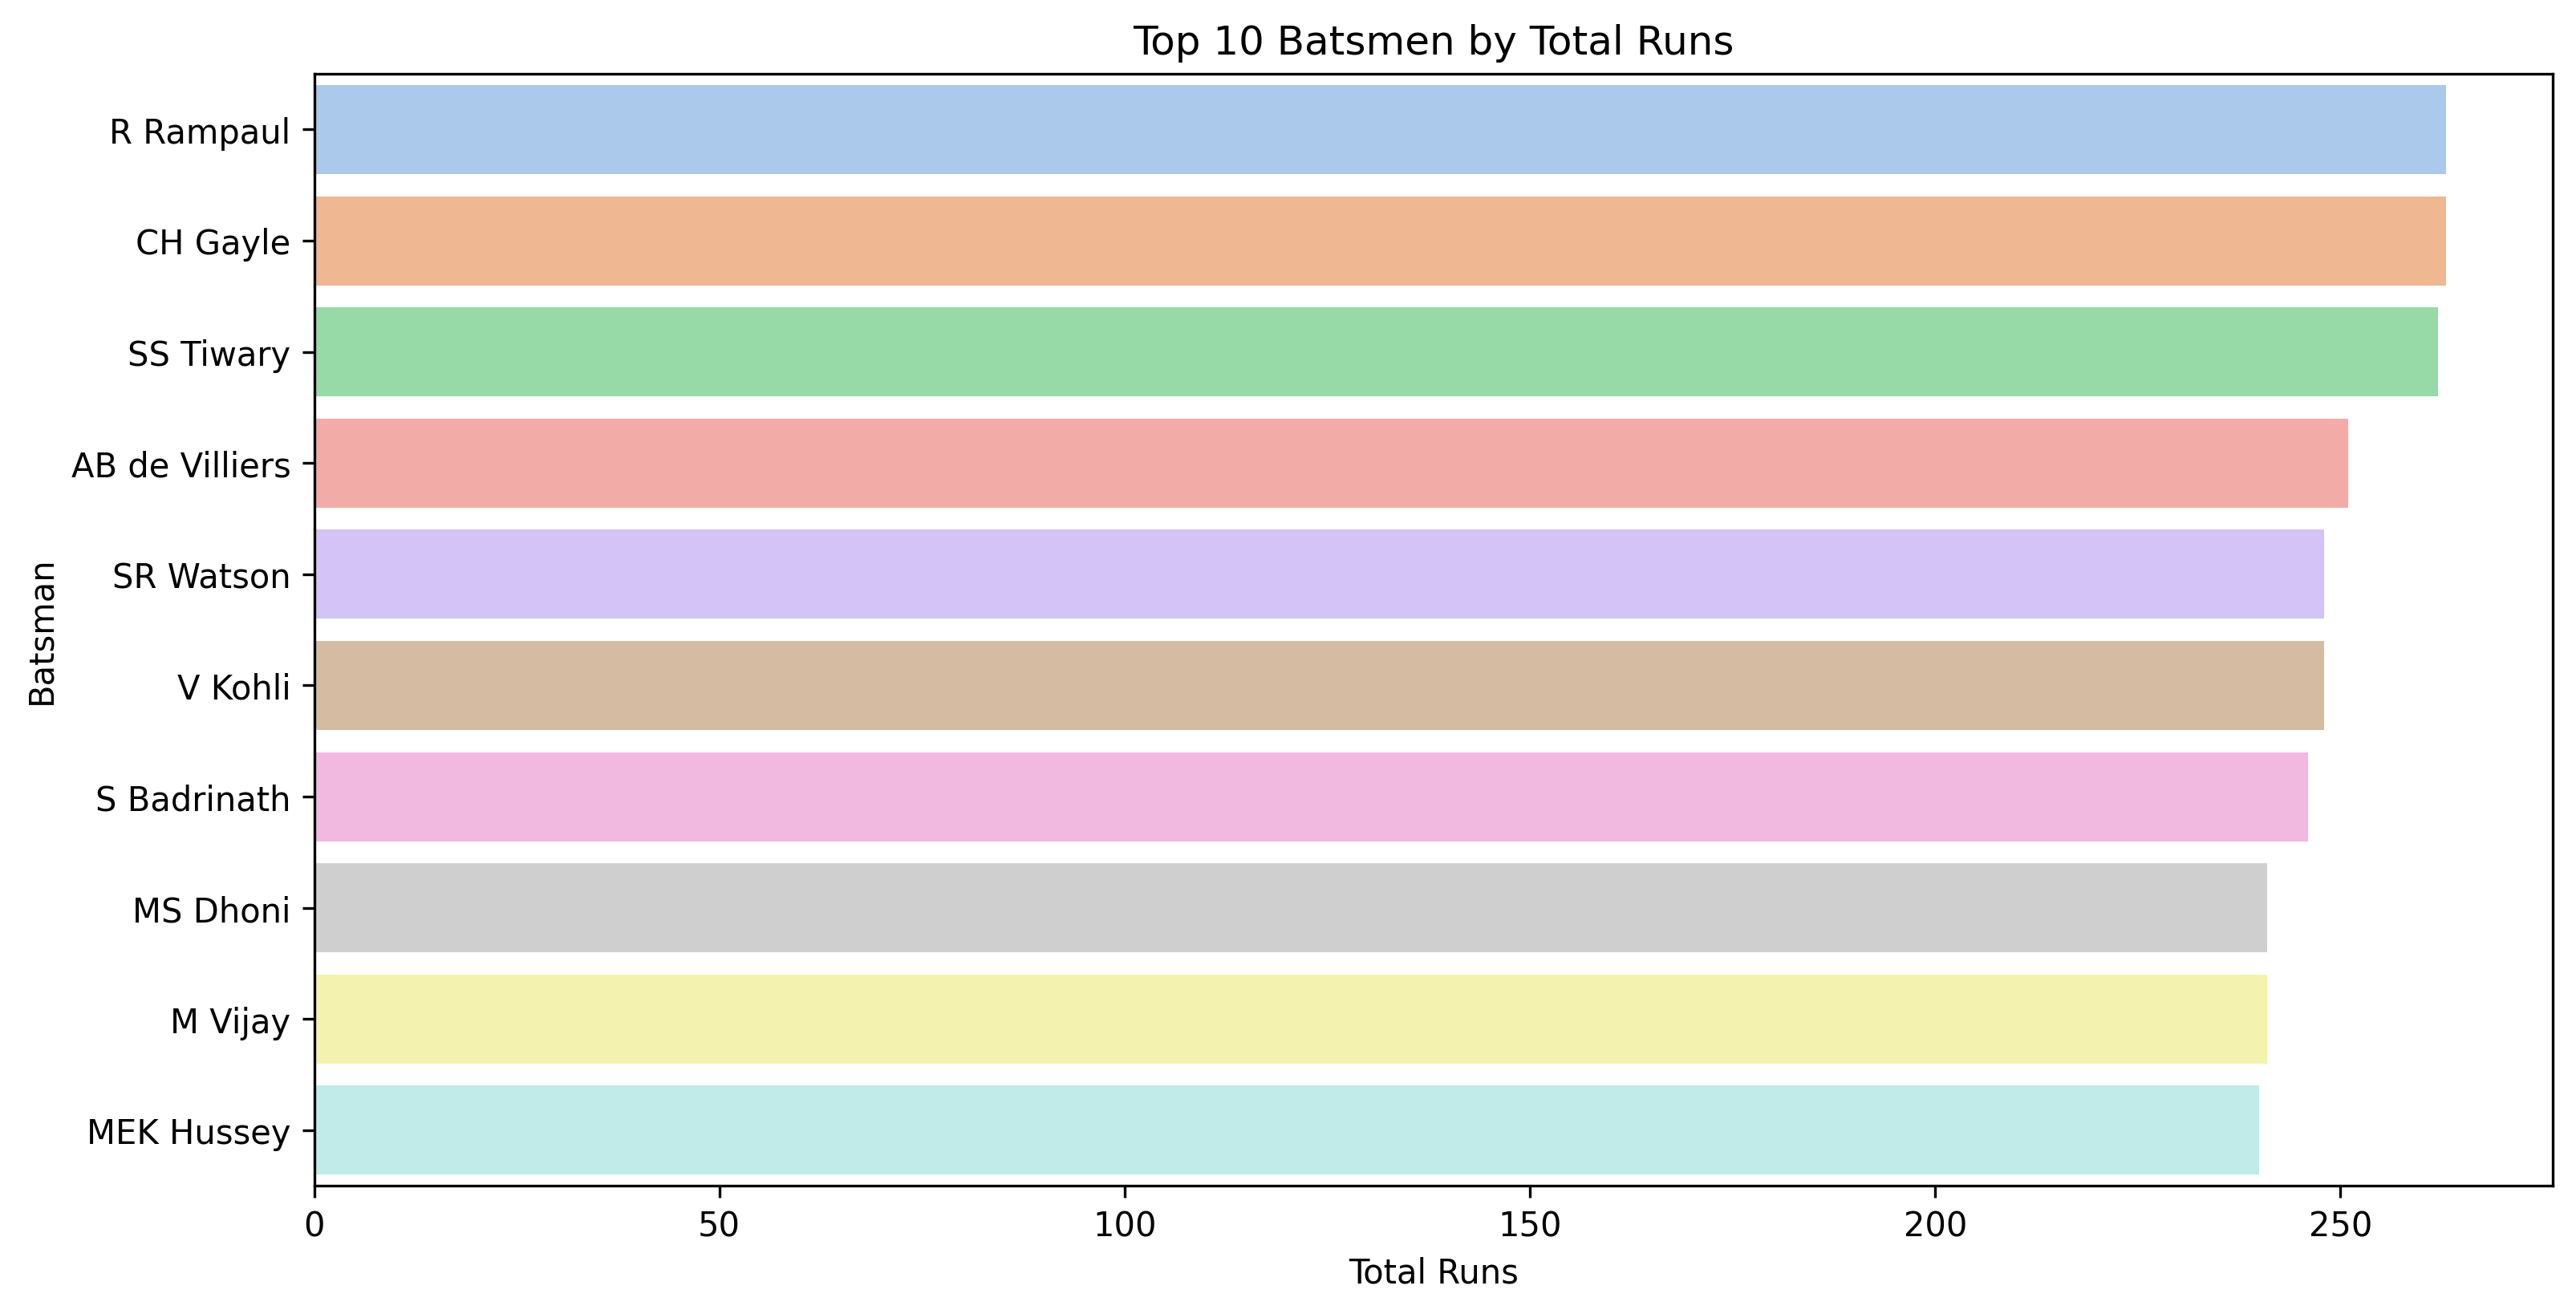

In [9]:
plt.figure(figsize=(12,6), dpi=300)
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index,palette="pastel")
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

In [10]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)
wickets_by_bowler

bowler
A Kumble         10
B Lee            10
B Kumar          10
CJ Jordan        10
DR Smith         10
DS Kulkarni      10
D Wiese          10
DW Steyn         10
DJ Bravo         10
Sohail Tanvir    10
Name: wickets, dtype: int64

C:\Users\Shreyansh\AppData\Local\Temp\ipykernel_2376\1678509254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


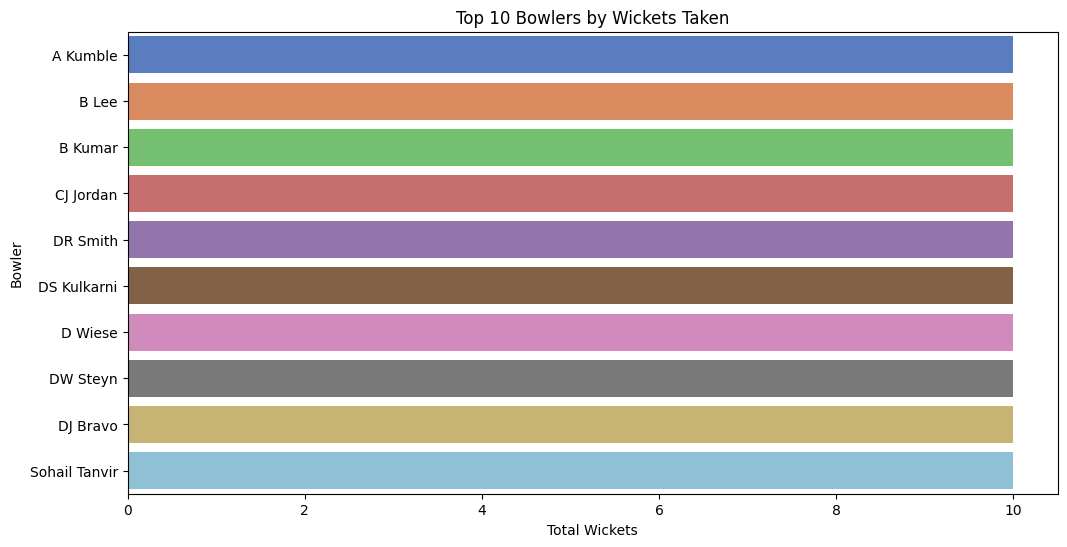

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman", "bowler"]

data_encoded = data.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

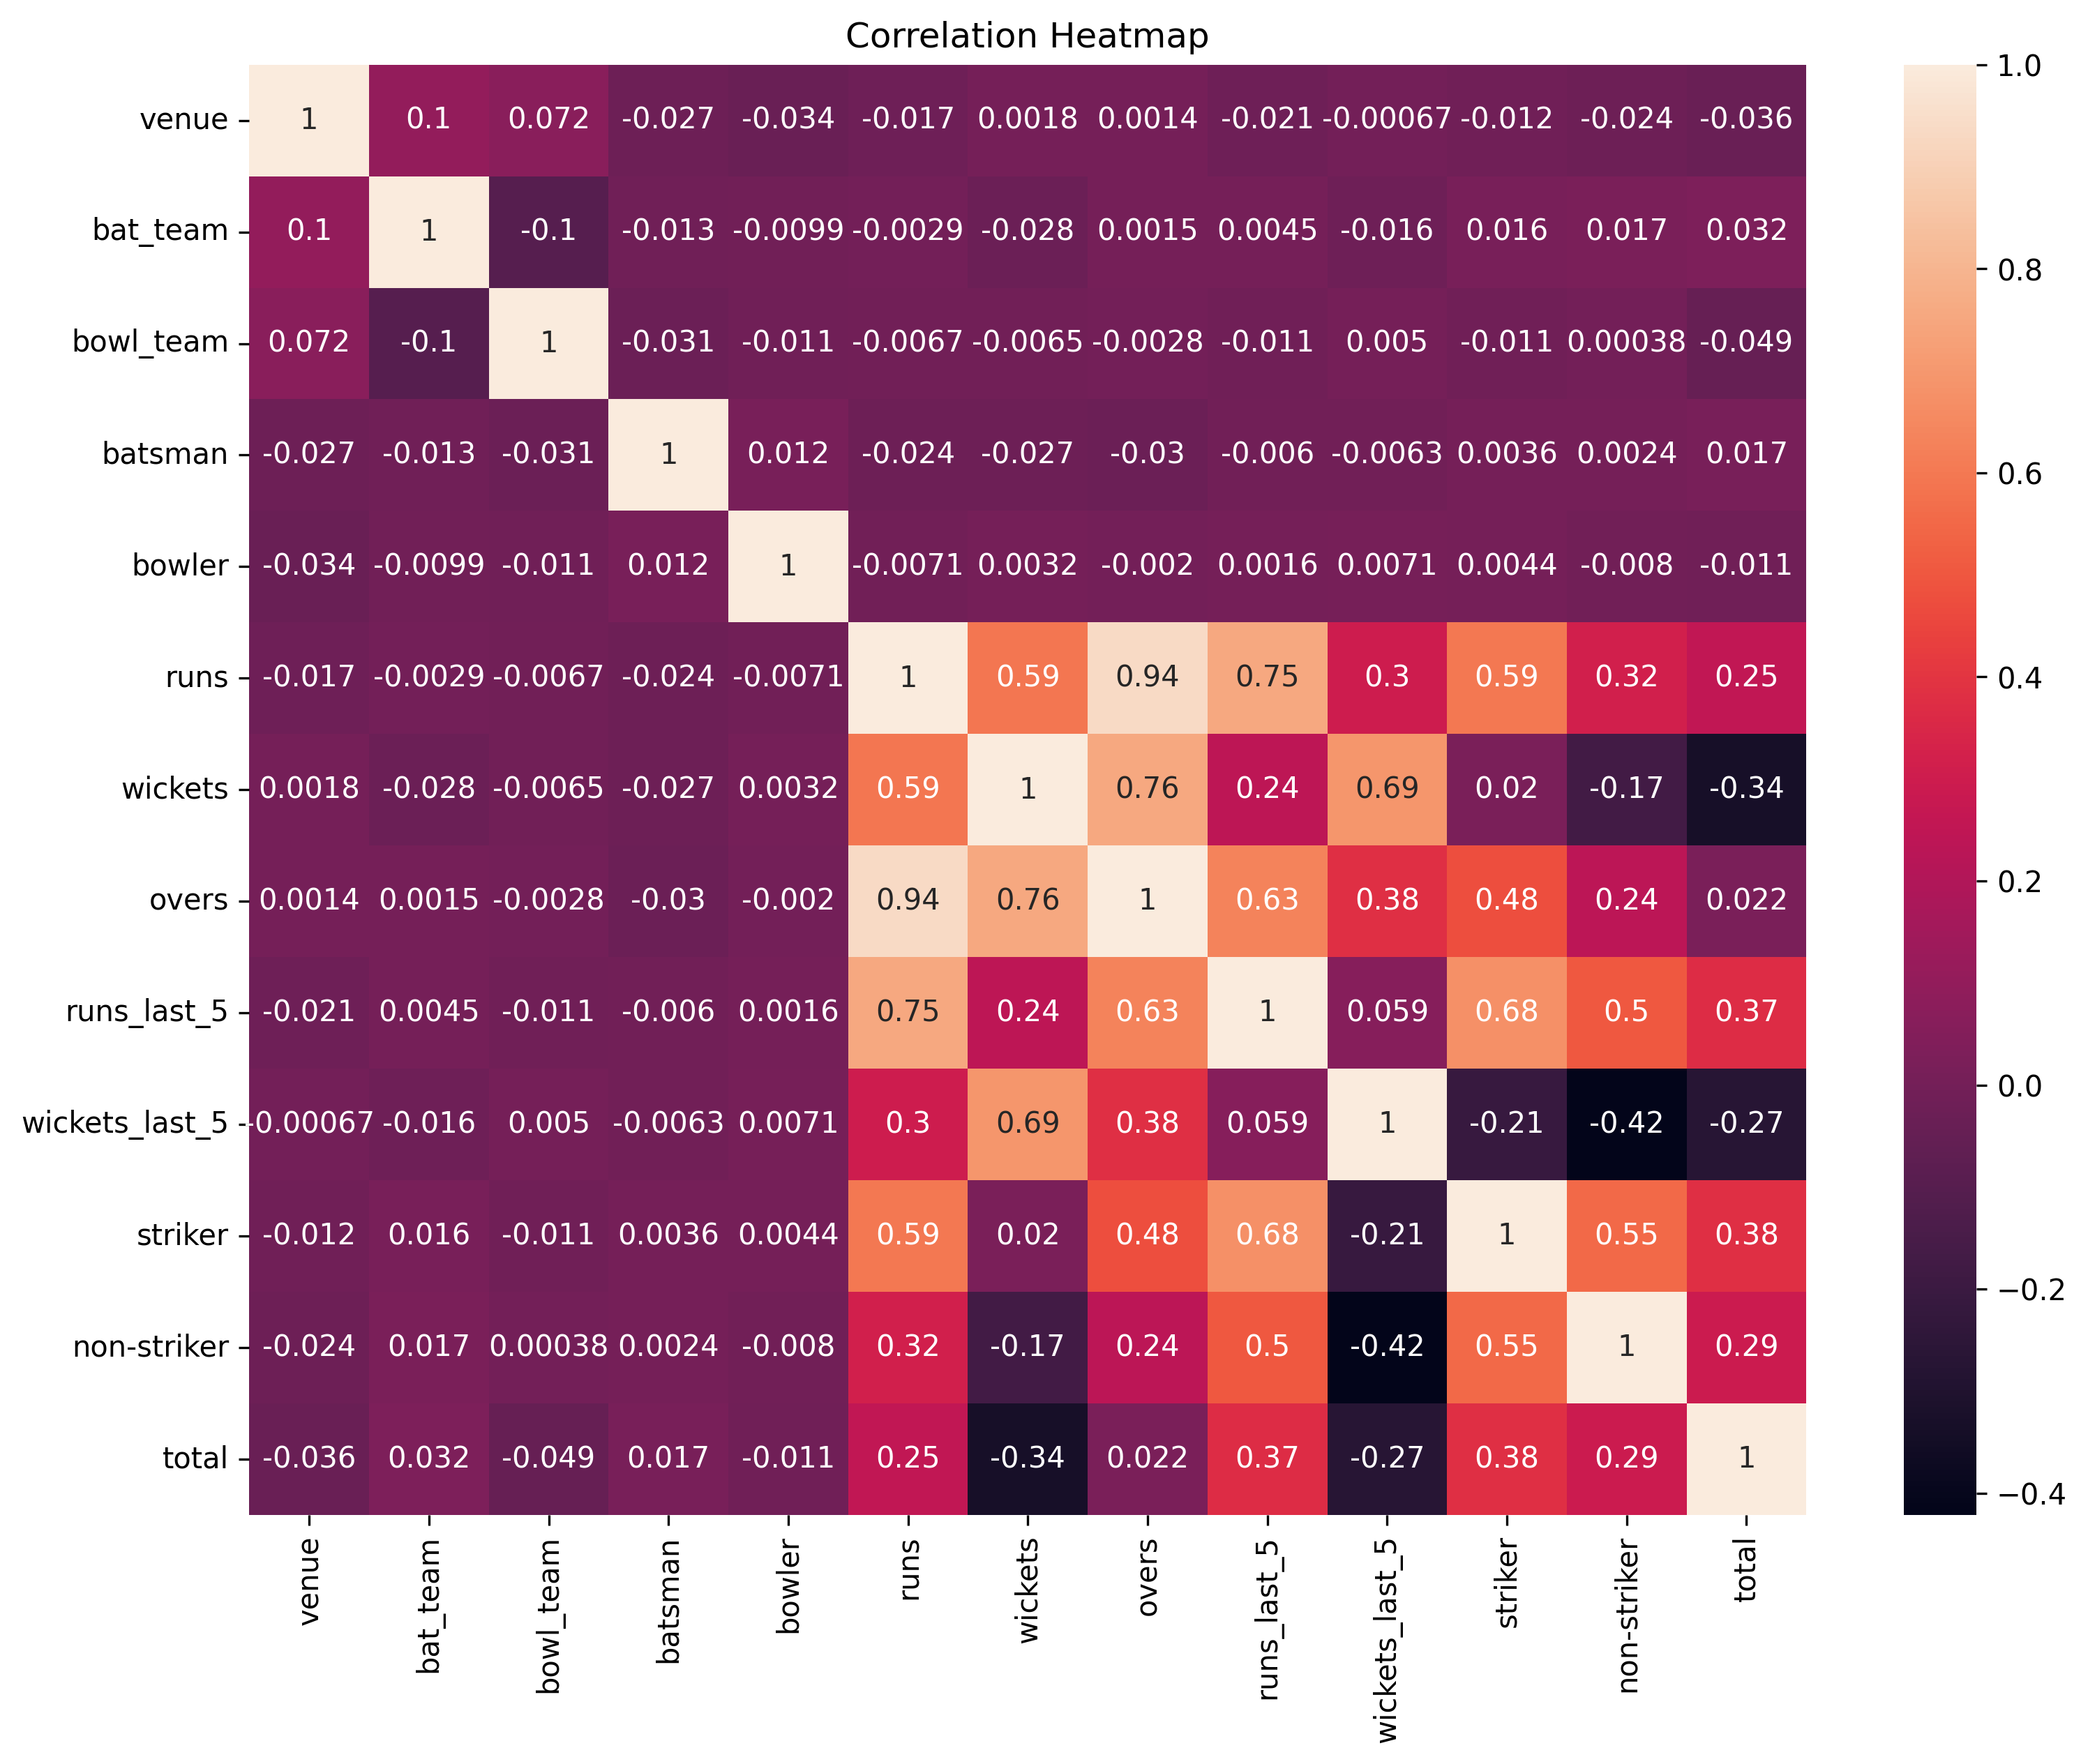

In [13]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=1)
plt.figure(figsize=(12, 9), dpi=300)
sns.heatmap(data_corr.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

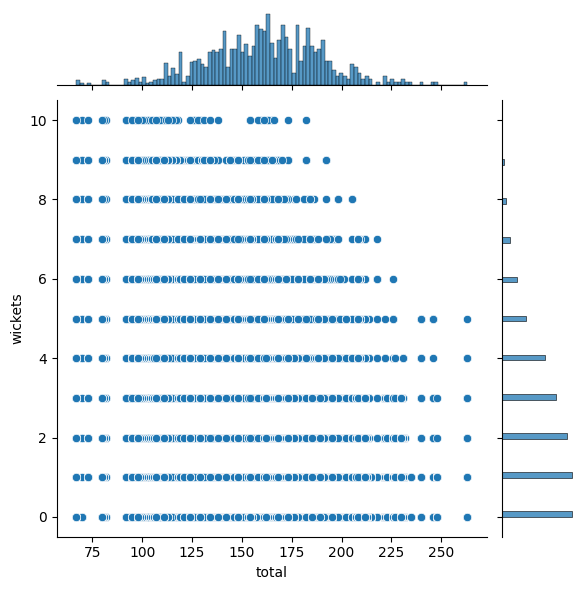

In [14]:
sns.jointplot(data=data, x="total", y="wickets", kind="scatter")
plt.show()

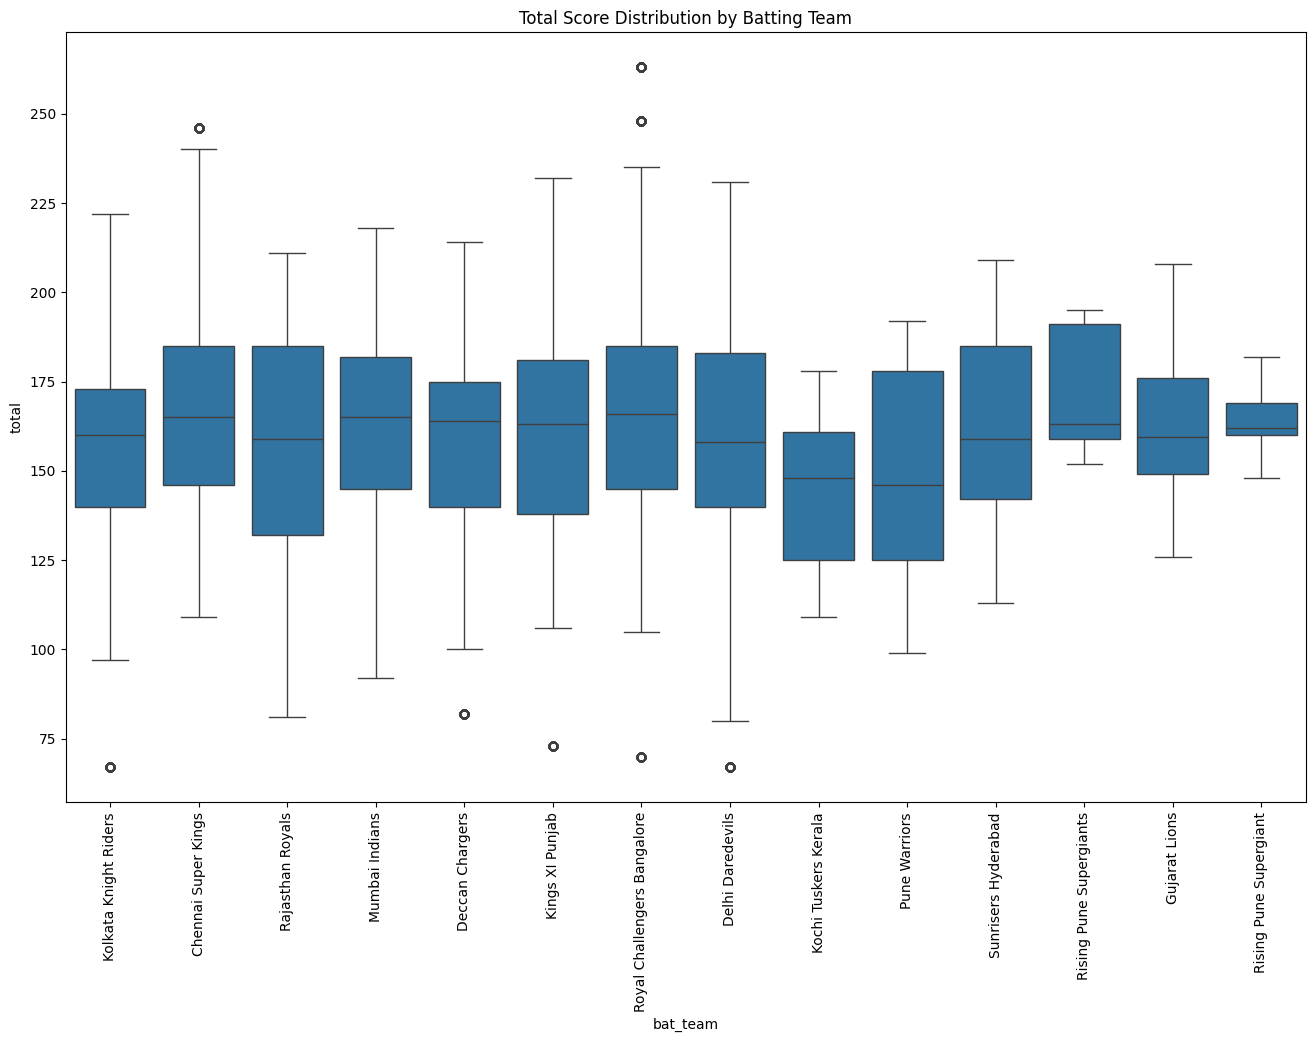

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data, x="bat_team", y="total")
plt.xticks(rotation=90)
plt.title("Total Score Distribution by Batting Team")
plt.show()

In [16]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs','striker','batsman','bowler']

X = data_encoded[feature_cols]
y = data_encoded['total'] 

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'),  
    keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

In [20]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 50.4430 - val_loss: 14.7763
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.9760 - val_loss: 14.3364
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.4942 - val_loss: 14.0065
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.3269 - val_loss: 13.9401
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.3880 - val_loss: 13.8710
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.1663 - val_loss: 14.0376
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.3788 - val_loss: 14.2226
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.2509 - val_loss: 14.3833
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.2033 - val_loss: 13.7539
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.1532 - val_loss: 14.2919


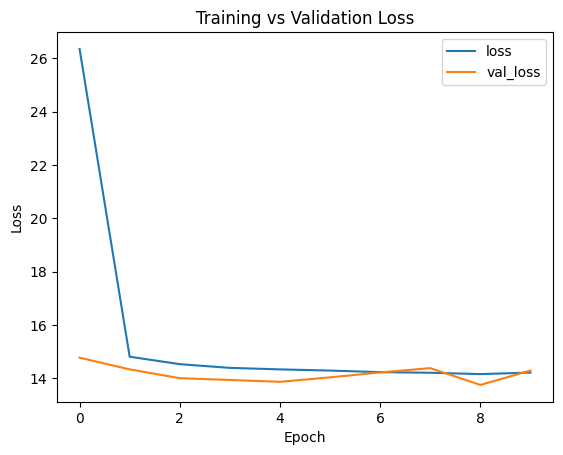

In [21]:
model_losses = pd.DataFrame(model.history.history)
ax = model_losses.plot()

# Label the axes and add a title
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training vs Validation Loss")
plt.show()

In [22]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,predictions), mean_squared_error(y_test, predictions))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step
14.783714294433594 405.4193420410156


In [23]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# Dropdowns
venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Select Venue:')
batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Select Bowling Team:')
striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Select Striker:')
bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Select Bowler:')

# Numeric inputs
runs = widgets.IntText(value=0, description='Runs:')
wickets = widgets.IntText(value=0, description='Wickets:')
overs = widgets.FloatText(value=0.0, description='Overs:')
striker_ind = widgets.IntText(value=0, description='Striker Index (0 or 1):')

# Button and output
predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()


def predict_score(b):
    with output:
        clear_output()
        try:
            encoded_inputs = [
                label_encoders['bat_team'].transform([batting_team.value])[0],
                label_encoders['bowl_team'].transform([bowling_team.value])[0],
                label_encoders['venue'].transform([venue.value])[0],
                runs.value,
                wickets.value,
                overs.value,
                striker_ind.value,
                label_encoders['batsman'].transform([striker.value])[0],
                label_encoders['bowler'].transform([bowler.value])[0]
            ]
            input_array = np.array(encoded_inputs).reshape(1, -1)
            input_scaled = scaler.transform(input_array)
            predicted_score = model.predict(input_scaled)

            print(f"🏏 Predicted Total Runs: {int(predicted_score[0][0])}")
        except Exception as e:
            print("⚠️ Error:", e)

# Connect button to function
predict_button.on_click(predict_score)

# Display the full UI
ui = widgets.VBox([
    venue, batting_team, bowling_team, striker, bowler,
    runs, wickets, overs, striker_ind,
    predict_button, output
])
display(ui)
